# 2 K-Means Clustering
In this notebook we will explore and cluster data with the K-Means algorithm.

In K-Means, a dataset is partitioned in _k_ clusters while trying to minimise the sum of squared distances of each point to its cluster centre. On of the characteristics of this algorithm is that the number of clusters _k_ is predefined, i.e. the choice is left to the machine learning practitioner.

You can find an overview of the algorithm on page 23 in the lecture.

Before we start however, we need two packages for some matplotlib magic that we did not use before, _ipywidgets_ and _ipympl_. We will use it later for a dynamic visualisation of our clusters. 

In [123]:
! pip install ipywidgets ipympl

No we can import the usual packages.

In [124]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ipywidgets as widgets
import warnings
%config InlineBackend.figure_format = 'svg' # matplotlib magic
np.random.seed(1337) # seeds help with reproducible results

## 2.1 The dataset
We are going to use familiar data, the Iris flower dataset.
However, the dataset contains four features. We want to be able to look at our clustering results later. Four dimensional data is hard to visualise for human brains. Thankfully, we know a handy dimensionality reduction technique.

### Task 2.1.1 Transform the data
- Load the Iris dataset with the provided function.
- Use the PCA class from sklearn to project the dataset into a two-dimensional space.

In [125]:
# your code here
iris_ds = load_iris()
pca = PCA(n_components=2)
iris_ds["data"]=pca.fit_transform(iris_ds["data"])


## 2.2 Initialization
Before we start with the learning phase, we need to set up a few initial parameters.

### Task 2.2.1 The _k_-Question
As mentioned, the choice of the right _k_ is an important decision for the success of the algorithm. The number of clusters you will stare at in the end, depends on _k_. Too many or too few clusters might give you suboptimal results.

Fortunately, we know that the Iris dataset is labeled. Those labels already partition the data. Therefore, let's choose _k_ according to the number of labels.

In [126]:
k = 3
print(iris_ds["data"])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

### Task 2.2.2 The first cluster centres
You have to start somewhere! Theoretically, you could choose arbitrary points in the input space. Unfortunately, if we choose those randomly, it might take a while to converge.

In order to speed things up a little, let's choose different random datapoints as the initial cluster centres and put them into a list/array.

_Hint:_ np.random has a few good functions for that purpose.

In [161]:
rows = np.random.choice(iris_ds["data"].shape[0], size=3, replace=False)
init_clusters = iris_ds["data"][rows,:]
print(init_clusters)

[[ 0.04522698 -0.58383438]
 [ 2.41874618  0.3047982 ]
 [-2.64475039  1.17876464]]


## 2.3 The Algorithm
Now the algorithm goes as follows:

    - obtain the distance of each point to each cluster centre
    - assign that point to the nearest cluster
    - move position of centre to mean of points in cluster
    
Thus, we need to calculate a few things.

### Task 2.3.1 Compute the distances
Complete the function _distances()_ that takes a list/array of datapoints and a list/array of cluster centres and returns the distance of each datapoint to each cluster centre.

In [128]:
def distances(data, centroids):
    data=np.array(data)
    centroids = np.array(centroids)
    res = []
    for dp in data:
        dists = []
        for center in centroids:
            dis = np.linalg.norm(dp-center)
            dists.append(dis)
        res.append(dists)
    return res


### Task 2.3.2 Assign to clusters
Now that we can compute the distances to the cluster centres, we need to assign the points to their respective clusters.

Complete the function _compute\_assignments()_ that takes a list/array of datapoints and a list/array of cluster centres and returns a list of assignments of each data point to the nearest cluster centre.

_Hint:_ Make ample use of the _distances()_ function you just wrote.

In [129]:
def compute_assignments(data, centroids):
    dists = distances(data, centroids)
    assignments=[]
    for i in range(len(data)):
        assignments.append(centroids[dists[i].index(min(dists[i]))])
    return assignments


### Task 2.3.3 New cluster centres
Now that we have our clusters, we can compute new centres that better represent the cluster.

Complete the function _compute\_new\_centres()_ that takes takes a list/array of datapoints and a list/array of assignments and returns the new cluster centres.

In [164]:
def compute_new_centres(data, assignments):
    data=np.asarray(data)
    assignments = np.array(assignments)
    centers=[]
    clusters = np.unique(assignments)
    for center in clusters:
        data_of_cluster = []
        for i in range(len(data)):
            if assignments[i].all() == center.all():
                data_of_cluster.append(data[i])
        data_of_cluster = np.array(data_of_cluster)

        if(len(data_of_cluster[:,0]) > 0 and len(data_of_cluster[:,1]) > 0):
            centers.append([np.mean(data_of_cluster[:,0]),np.mean(data_of_cluster[:,1])])
    return centers
#print(compute_new_centres([[1,2],[3,4],[0,0],[5,5]],[[0,0],[0,0],[5,5],[0,0]]))

[[3.0, 3.6666666666666665], [0.0, 0.0]]


The most important parts are done! Theoretically, we only need to run the algorithm repeatedly until the cluster centres do not change anymore.

## 2.4 Cluster quality
As we have seen in previous assignments, blindly running an algorithm without evaluating the quality of its results is not always the best idea.

Hence, we will use the Davies Bouldin Index to evaluate the quality of our clusters (see also page 18 in the lecture).

### Task 2.4.1 The Davies-Bouldin-Index

Write a function _db\_index()_ that takes a list/array of datapoints, a list/array of cluster centres and a list/array of assignments and returns the Davies-Bouldin Index.

You will need to:
    
    - calculate the radii of the clusters, R
    - calculate the inter class distance between the clusters
    - calculate the badness of separation between the clusters, D
    
Lastly, you need to average over the relevant D-values of each cluster.

All necessary formulas can be found in lecture 19, "Basic Clustering.

In [162]:
def db_index(data, centroids, assignments):
    #data = np.asarray(data)
    centroids = np.asarray(centroids)
    assignments = np.asarray(assignments)
    #print("centroids:",centroids)
    radii=[]
    for center in centroids:
        data_of_cluster = []
        for i in range(len(data)):
            if assignments[i].all() == center.all():
                data_of_cluster.append(data[i])
        sum_of_differences = 0
        for i in range(len(data_of_cluster)):
            sum_of_differences += (np.linalg.norm(data_of_cluster-center))**2
        if len(data_of_cluster) == 0:
            sum_of_differences = 0
        else:
            sum_of_differences = sum_of_differences/len(data_of_cluster)
        radius = np.sqrt(sum_of_differences)
        radii.append(radius)
        
    D_worst=[]
    for j in range(len(centroids)):
        badnesses=[]
        for i in range(len(centroids)):
            #print("centroid,",centroids[j])
            if centroids[j].any() != centroids[i].any():
                badnesses.append((radii[j]+radii[i])/(np.linalg.norm(centroids[j]-centroids[i])))
        if badnesses != []:
            D_worst.append(np.max(badnesses))
    
    return np.mean(D_worst)

print(db_index([[1,2],[3,4]],[[0,0],[5,5]],[[0,0],[0,0]]))

0.7745966692414834


## 2.5 Learning Phase

### Task 2.5.1 Iterative Clustering
Finally, we have all the ingredients in order to cluster our data. Remember, we already initialised the first cluster centres.

Therefore, for 20 iterations, you will need to:

    - compute the cluster assignments
    - compute the new cluster centres according to the assignments
    - compute the DB index for the current assignments and cluster centres
    
Do not forget to log relevant data for each iteration:

    - the cluster centres
    - the cluster assignments
    - the DB-Index

In [163]:
iterations = 20
centers = init_clusters
data = iris_ds["data"]
assignments = compute_assignments(data, init_clusters)
db_logs = []
center_logs = []
assignment_logs = []

for i in range(iterations):
    assignments = compute_assignments(data, centers)
    print(centers)
    centers = compute_new_centres(data, assignments)
    db_logs.append(db_index(data, centers, assignments))
    center_logs.append(centers)
    assignment_logs.append(assignments)
print(db_logs)

[[ 0.04522698 -0.58383438]
 [ 2.41874618  0.3047982 ]
 [-2.64475039  1.17876464]]
[[-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16]]
[[-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16]]
[[-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16]]
[[-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16]]
[[-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16]]
[[-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927e-16]]
[[-2.9369099744750807e-15, -8.940996091647927e-16], [-2.9369099744750807e-15, -8.940996091647927

## 2.6 Evaluation

### Task 2.6.1 Plotting the DB-Index
Plot the DB-Index over the iterations.

In [ ]:
%matplotlib inline
# your code here

### Task 2.6.2 Plotting the Cluster Assignments
In order to see how the clusters evolve over the iterations, plotting the state of the iterations over and over again is a bit cumbersome. Therefore we are going to use some matplotlib magic to make an interactive plot within this notebook.

The _plot\_clusters()_ function takes as an argument the current iteration and updates the plot with the relevant data from the iteration. If everything works out, you can then use the interaction slider to go back and forth between the iterations and see how the clusters develop.

In [ ]:
%matplotlib widget
_, ax = plt.subplots()

    
def plot_clusters(iteration):
    iter_assignments = # get current cluster assignments
    iter_centres = # get current cluster centres
    ax.clear()
    ax.set_xlabel('YOUR LABEL HERE')
    ax.set_ylabel('YOUR LABEL HERE')
    ax.set_title('YOUR TITLE HERE')
    
    # Plot each cluster
    for i in range(k):
        points = # get data points belonging to cluster i
        ax.scatter(points[:, 0], points[:, 1], color="C{}".format(i), s=20)
        ax.scatter(iter_centres[i, 0], iter_centres[i, 1], color="C{}".format(i), 
                   marker='s', s=50, edgecolor="black", linewidth=2)
    

iteraction_slider = widgets.IntSlider(min=0, max=iterations-1, description='Iteration:')
widgets.interact(plot_clusters, iteration=iteraction_slider);

### Task 2.6.3 Clustered Data vs Labeled Data
In the beginning, we told our K-Means algorithm to separate the data into three clusters, because we have labels that also separate the data into three parts.

Create two plots side-by-side (using subplots), where one side is showing the clustered data and the other side is showing the partitions of the labeled data. 

In [ ]:
%matplotlib inline
# your code here

## 2.7 K-Means in the wild
It is quite fun to write the K-Means algorithm from the ground up. But, usually, a practitioner would rely on libraries, which have already implemented the algorithm, if possible.
K-Means is implemented in the sk-learn library, so we are going to use it cluster somewhat more complex data and visualise the cluster centres.

In [165]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

### Task 2.7.1 Digits data and the K-Question
Load the digits data set and decide the obvious question of how many cluster centres we want to have.

In [169]:
digits=load_digits()["data"]
k = 10
print(digits)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


### Task 2.7.2 Run the K-Means algorithm
Use the provided KMeans object on the digits data and extract the cluster centres

In [196]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(digits)
clusters = kmeans.cluster_centers_

### 2.7.3 Plot the Cluster Centres
Plot all the extracted cluster centres

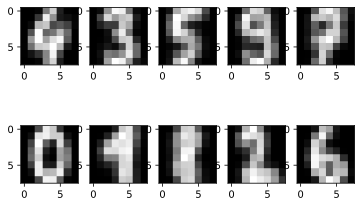

In [197]:
%matplotlib inline
_, axis = plt.subplots(2, 5)
centers = clusters.reshape(10, 8, 8)
for plot, center in zip(axis.flat, centers):
    plot.imshow(center, cmap="gray")